# Predict which customers are going to pick up the phone. T
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not a customer going to pick up the phone.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

##  1. Problem definition


In a statement,

``Given data about the performance of the commercial activity carried
out by the Client Remote Management team, can we predict whether or not a client will pick up the phone?``

## 2. Data
The original data came from Portuguese bank.

The dataset:
There’s two datasets:
• Clients.csv – This file contains the personal information of each customer, such as
age, gender, location,…
• Phone_calls_history.csv – This file contains the history of attempted calls made by
the call centre team
The details of each column can be found on the tables_description.csv file attached

## 3. Evaluation
If we can reach 75% accuracy at predicting whether or not a client pick yo the phone during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. **Create data dictionary**:

### Clients Table	


* n_cliente: Client ID
* age: Client Age
* marital_status: Client's marital status
* location: Client's location
* salary_interval: Average interval of the last 6 salaries
* active_portfolio: Sum of active portfolio amounts


### Phone_calls_history table


* interaction_id: interaction number	
* n_cliente: Client ID	
* date: date of the call	
* month: Month in which the call took place 	
* weekday: Day of the week in which the call took place	
* hour: call start hour	
* answered: It allows to identify if the call was carried out successfully or not. 	0 - Unsuccessful, 1 - successful.






## Preparing the tools
we're going to use pandas, matplotlit and NumPy for data analysis and manipulation




In [1]:
# Import all the tools we need
# Regular EDA ( exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# we want our plots to appear inside the notebook

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load the data



In [12]:
clients = pd.read_csv("./fullvenue/clients.csv")
clients.head()

,n_cliente,age,marital_status,location,salary_interval,active_portfolio
0,fa7e253f3ce347cea79b1ea04bd297b4,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05
1,9dd6227353074a06b2099ad454a1d40c,57,CASADO REG COMUNHAO ADQUIRIDOS,VIANA DO CASTELO,1500-1999,0.00
2,d2f463f6ae8f4d878c54b518ba1af9ea,66,VIUVO,LISBOA,0,86084.21
3,098903d9d01744d68b08297d97a424ad,43,SOLTEIRO,FARO,0,0.00
4,d5b0f1136bab47dda489d1eeaae9edf4,35,SOLTEIRO,PORTO,0,0.00


In [28]:
len(clients)

1000

In [19]:
clients.tail()

,n_cliente,age,marital_status,location,salary_interval,active_portfolio
995,ea40a71fbc504a42a7f38919cf3e336e,47,CASADO REG COMUNHAO ADQUIRIDOS,BRAGA,0,0.0
996,ef1288f082d14ce39995ba0e62a9ff5d,38,SOLTEIRO,SETUBAL,500-999,0.0
997,107d82267a5c4899b97c3d97a975eb51,30,SOLTEIRO,LISBOA,0,0.0
998,5f7409bcaafb455fa9d9a6f4e3101861,33,UNIDO DE FACTO,SANTAREM,0,0.0
999,563ddd9909a7411dabd70b858ce00b5c,57,CASADO REG COMUNHAO ADQUIRIDOS,-,0,0.0


In [14]:
call_history = pd.read_csv("./fullvenue/phone_calls_history.csv")

call_history.head()

,interaction_id,n_cliente,date,month,weekday,hour,answered
0,134338673,fe92248729c44f448481c5780127e6d1,29/09/2020,SETEMBRO,TERCA-FEIRA,9,1
1,138365441,d235bcd9b61e439f876e1fd161014985,16/11/2020,NOVEMBRO,SEGUNDA-FEIRA,16,1
2,138790167,58f19d9ca083478c98a715287b2e356c,24/11/2020,NOVEMBRO,TERCA-FEIRA,11,0
3,130177935,d02b3f88a772486385642416b78714cc,16/07/2020,JULHO,QUINTA-FEIRA,10,0
4,119408985,342f6adede604e2d87d640288455a86c,06/03/2020,MARCO,SEXTA-FEIRA,11,1


In [24]:
call_history.tail()

,interaction_id,n_cliente,date,month,weekday,hour,answered
7511,121270875,78ceb86e84eb4f08825f5a057bf8f3c3,31/03/2020,MARCO,TERCA-FEIRA,12,0
7512,124709445,01c79a286b474f73bdd42c65cbb9c74c,28/04/2020,ABRIL,TERCA-FEIRA,9,1
7513,46402756,ba528b3607f645a5867d9400c188f8aa,14/07/2020,JULHO,TERCA-FEIRA,13,1
7514,137677023,070c23788c204562939d94acd76a0f59,04/11/2020,NOVEMBRO,QUARTA-FEIRA,12,1
7515,138987951,065f4b25aac64ce1a8ddece29f0affa2,27/11/2020,NOVEMBRO,SEXTA-FEIRA,11,1


In [23]:
call_history.iloc[999]

interaction_id                            48457444
n_cliente         147404f40d084492a59e1967c644fa46
date                                    25/11/2020
month                                     NOVEMBRO
weekday                               QUARTA-FEIRA
hour                                            10
answered                                         1
Name: 999, dtype: object

In [15]:
call_history.shape

(7516, 7)

In [112]:
## full data set
df = pd.merge(clients, call_history, how="inner", on="n_cliente")

df.head()



,n_cliente,age,marital_status,location,salary_interval,active_portfolio,interaction_id,date,month,weekday,hour,answered
0,fa7e253f3ce347cea79b1ea04bd297b4,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,139309321,03/12/2020,DEZEMBRO,QUINTA-FEIRA,13,1
1,fa7e253f3ce347cea79b1ea04bd297b4,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,41729502,23/03/2020,MARCO,SEGUNDA-FEIRA,12,1
2,fa7e253f3ce347cea79b1ea04bd297b4,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,41895414,30/03/2020,MARCO,SEGUNDA-FEIRA,9,1
3,fa7e253f3ce347cea79b1ea04bd297b4,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,137597503,03/11/2020,NOVEMBRO,TERCA-FEIRA,11,1
4,fa7e253f3ce347cea79b1ea04bd297b4,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,48418030,21/11/2020,NOVEMBRO,SABADO,15,1


In [113]:
len(df)

7516

In [114]:
#(rows, columns)
df.shape

(7516, 12)

In [115]:
df= df.drop("n_cliente", axis=1)
df.head()

,age,marital_status,location,salary_interval,active_portfolio,interaction_id,date,month,weekday,hour,answered
0,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,139309321,03/12/2020,DEZEMBRO,QUINTA-FEIRA,13,1
1,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,41729502,23/03/2020,MARCO,SEGUNDA-FEIRA,12,1
2,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,41895414,30/03/2020,MARCO,SEGUNDA-FEIRA,9,1
3,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,137597503,03/11/2020,NOVEMBRO,TERCA-FEIRA,11,1
4,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,48418030,21/11/2020,NOVEMBRO,SABADO,15,1


In [116]:
df= df.drop("interaction_id", axis=1)
df.head()

,age,marital_status,location,salary_interval,active_portfolio,date,month,weekday,hour,answered
0,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,03/12/2020,DEZEMBRO,QUINTA-FEIRA,13,1
1,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,23/03/2020,MARCO,SEGUNDA-FEIRA,12,1
2,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,30/03/2020,MARCO,SEGUNDA-FEIRA,9,1
3,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,03/11/2020,NOVEMBRO,TERCA-FEIRA,11,1
4,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,21/11/2020,NOVEMBRO,SABADO,15,1


In [117]:
df.tail()

,age,marital_status,location,salary_interval,active_portfolio,date,month,weekday,hour,answered
7511,33,UNIDO DE FACTO,SANTAREM,0,0.0,28/10/2020,OUTUBRO,QUARTA-FEIRA,14,1
7512,57,CASADO REG COMUNHAO ADQUIRIDOS,-,0,0.0,03/12/2020,DEZEMBRO,QUINTA-FEIRA,16,1
7513,57,CASADO REG COMUNHAO ADQUIRIDOS,-,0,0.0,17/12/2020,DEZEMBRO,QUINTA-FEIRA,15,0
7514,57,CASADO REG COMUNHAO ADQUIRIDOS,-,0,0.0,30/11/2020,NOVEMBRO,SEGUNDA-FEIRA,17,1
7515,57,CASADO REG COMUNHAO ADQUIRIDOS,-,0,0.0,03/12/2020,DEZEMBRO,QUINTA-FEIRA,16,1


## Data Exploration ( exploratory data analysis or EDA)
The goal here is to find out about the data and become a subject matter expert on the dataset you're working with

* What question(s) are you trying to solve?
* what kind of data do we have and how do we treat different types?
* What's missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?

In [118]:
df["salary_interval"].value_counts()

0            4228
1000-1499    1167
500-999       883
1500-1999     603
2000-2499     366
<500          100
>=3000         87
2500-2999      82
Name: salary_interval, dtype: int64

In [119]:
# Let's find out how many of each class there
df["answered"].value_counts()

1    5075
0    2441
Name: answered, dtype: int64

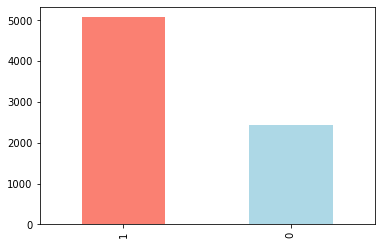

In [120]:
df["answered"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

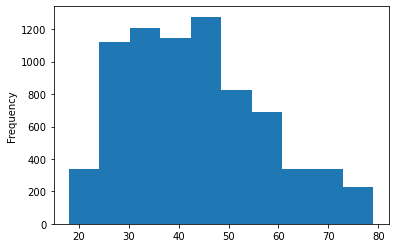

In [121]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7516 entries, 0 to 7515
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               7516 non-null   int64  
 1   marital_status    7502 non-null   object 
 2   location          7516 non-null   object 
 3   salary_interval   7516 non-null   object 
 4   active_portfolio  7516 non-null   float64
 5   date              7516 non-null   object 
 6   month             7516 non-null   object 
 7   weekday           7516 non-null   object 
 8   hour              7516 non-null   int64  
 9   answered          7516 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 645.9+ KB


In [123]:
# Are there any missing values?
df.isna().sum()


age                  0
marital_status      14
location             0
salary_interval      0
active_portfolio     0
date                 0
month                0
weekday              0
hour                 0
answered             0
dtype: int64

In [124]:
df['location'] = df['location'].replace(["-"], [np.nan])
df.tail()





,age,marital_status,location,salary_interval,active_portfolio,date,month,weekday,hour,answered
7511,33,UNIDO DE FACTO,SANTAREM,0,0.0,28/10/2020,OUTUBRO,QUARTA-FEIRA,14,1
7512,57,CASADO REG COMUNHAO ADQUIRIDOS,NaN,0,0.0,03/12/2020,DEZEMBRO,QUINTA-FEIRA,16,1
7513,57,CASADO REG COMUNHAO ADQUIRIDOS,NaN,0,0.0,17/12/2020,DEZEMBRO,QUINTA-FEIRA,15,0
7514,57,CASADO REG COMUNHAO ADQUIRIDOS,NaN,0,0.0,30/11/2020,NOVEMBRO,SEGUNDA-FEIRA,17,1
7515,57,CASADO REG COMUNHAO ADQUIRIDOS,NaN,0,0.0,03/12/2020,DEZEMBRO,QUINTA-FEIRA,16,1


In [125]:
# Are there any missing values?
df.isna().sum()


age                   0
marital_status       14
location            629
salary_interval       0
active_portfolio      0
date                  0
month                 0
weekday               0
hour                  0
answered              0
dtype: int64

In [126]:
df.groupby("location").count()

,age,marital_status,salary_interval,active_portfolio,date,month,weekday,hour,answered
location,,,,,,,,,
AVEIRO,243,243,243,243,243,243,243,243,243
AZORES,191,191,191,191,191,191,191,191,191
BEJA,171,171,171,171,171,171,171,171,171
BRAGA,315,305,315,315,315,315,315,315,315
BRAGANCA,18,18,18,18,18,18,18,18,18
CASTELO BRANCO,54,54,54,54,54,54,54,54,54
COIMBRA,418,418,418,418,418,418,418,418,418
EVORA,127,127,127,127,127,127,127,127,127
FARO,120,120,120,120,120,120,120,120,120


In [127]:
df.describe()

,age,active_portfolio,hour,answered
count,7516.000000,7516.000000,7516.000000,7516.000000
mean,43.406067,30915.001795,13.302422,0.675226
std,13.584563,63499.328531,3.696244,0.468321
min,18.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,11.000000,0.000000
50%,42.000000,0.000000,13.000000,1.000000
75%,52.000000,34739.360000,16.000000,1.000000
max,79.000000,332881.080000,23.000000,1.000000


## Answered Frecuency according to Weekday


In [128]:
df.weekday.value_counts()

QUARTA-FEIRA     1490
SEGUNDA-FEIRA    1437
QUINTA-FEIRA     1413
TERCA-FEIRA      1402
SEXTA-FEIRA      1285
SABADO            258
DOMINGO           231
Name: weekday, dtype: int64

In [129]:
pd.crosstab(df.weekday, df["answered"])

answered,0,1
weekday,,
DOMINGO,85,146
QUARTA-FEIRA,468,1022
QUINTA-FEIRA,461,952
SABADO,89,169
SEGUNDA-FEIRA,480,957
SEXTA-FEIRA,422,863
TERCA-FEIRA,436,966


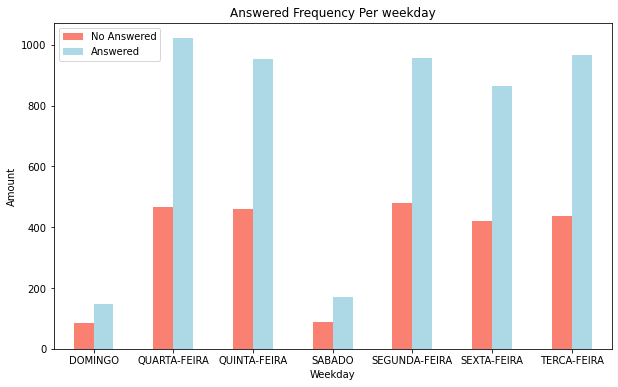

In [130]:
# Make the crosstab more visual
pd.crosstab(df.weekday, df["answered"]).plot(kind="bar",
                                   figsize=(10, 6),
                                   color =["salmon", "lightblue"])

# Add some communication
plt.title("Answered Frequency Per weekday")
plt.xlabel("Weekday")
plt.ylabel("Amount")
plt.legend(["No Answered", "Answered"])
plt.xticks(rotation = 0);

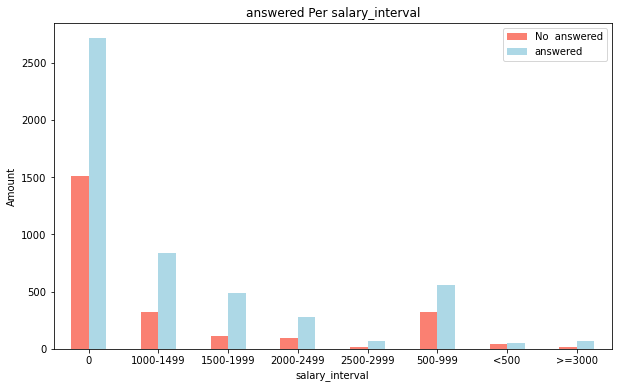

In [131]:
# Make the crosstab more visual
pd.crosstab(df["salary_interval"], df["answered"]).plot(kind="bar",
                                   figsize=(10, 6),
                                   color =["salmon", "lightblue"])

# Add some communication
plt.title("answered Per salary_interval")
plt.xlabel("salary_interval")
plt.ylabel("Amount")
plt.legend(["No  answered", "answered"])
plt.xticks(rotation = 0);

<AxesSubplot:ylabel='Frequency'>

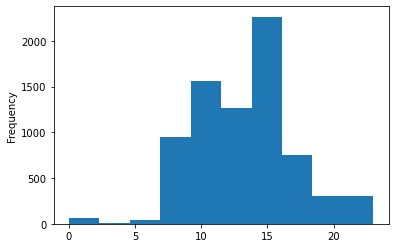

In [132]:
df.hour.plot.hist()

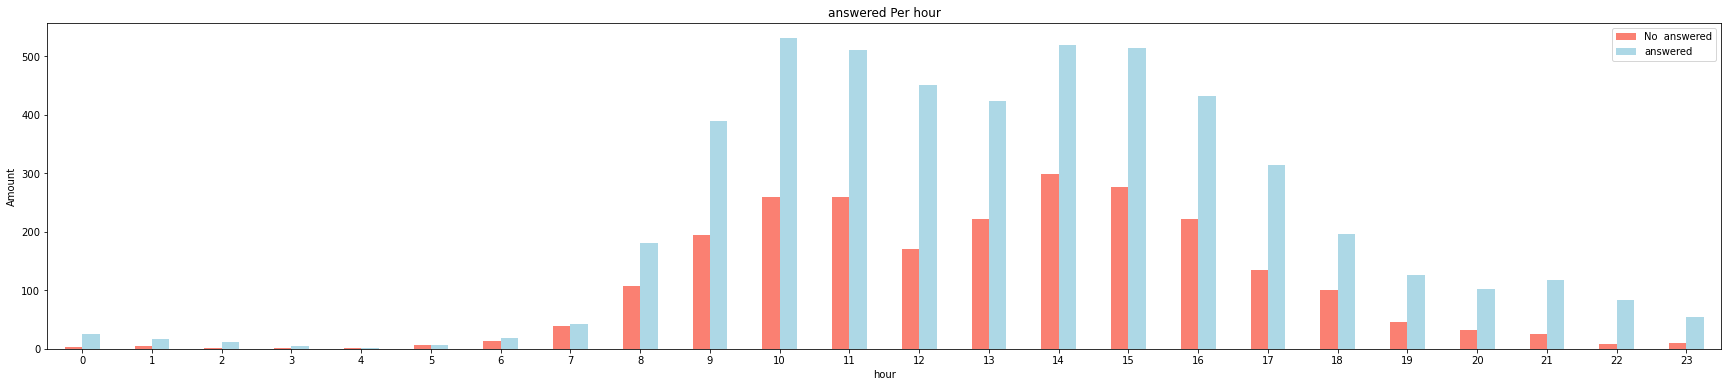

In [133]:
# Make the crosstab more visual
pd.crosstab(df.hour, df["answered"]).plot(kind="bar",
                                   figsize=(30, 6),
                                   color =["salmon", "lightblue"])

# Add some communication
plt.title("answered Per hour")
plt.xlabel("hour")
plt.ylabel("Amount")
plt.legend(["No  answered", "answered"])
plt.xticks(rotation = 0);

## Age vs. weekday for answered

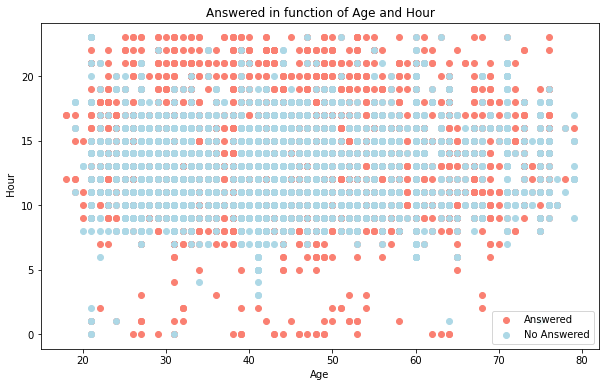

In [134]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postive examples
plt.scatter(df.age[df["answered"] == 1],
            df.hour[df["answered"]==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df["answered"]==0],
            df.hour[df["answered"]==0],
            c="lightblue")
# Add some helpful info
plt.title("Answered in function of Age and Hour")
plt.xlabel("Age")
plt.ylabel(" Hour")
plt.legend(["Answered", "No Answered"]);

(4.5, -0.5)

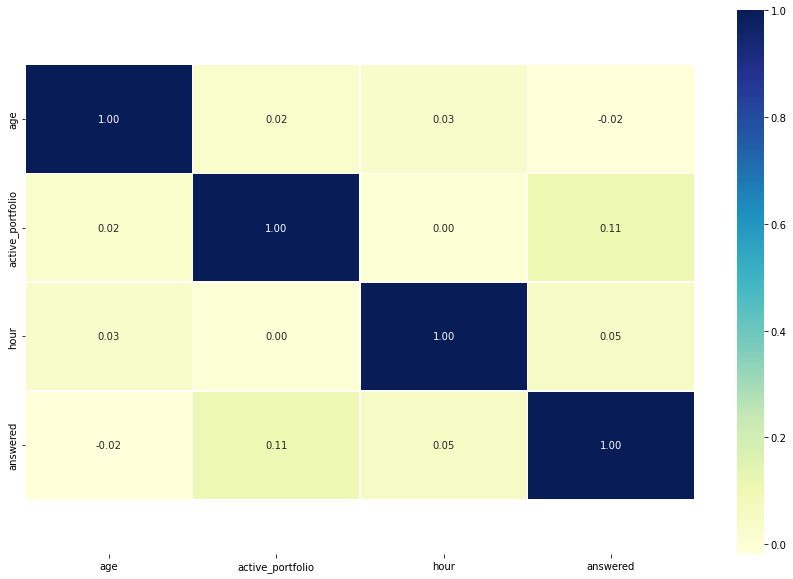

In [152]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5 )

In [135]:
#

In [136]:
from  sklearn.model_selection import train_test_split

# Split into X & y

X = df.drop(["answered", "date"], axis=1)

y= df["answered"]



# Split data into train and test


np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

X_train["location"] = X_train['location'].fillna(X_train['location'].mode()[0])

X_train["marital_status"] = X_train["marital_status"].fillna(X_train["marital_status"].mode()[0])

X_test["location"] = X_test['location'].fillna(X_train['location'].mode()[0])

X_test["marital_status"] = X_test["marital_status"].fillna(X_train["marital_status"].mode()[0])


<ipython-input-136-a3b8110ec1a7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["location"] = X_train['location'].fillna(X_train['location'].mode()[0])
<ipython-input-136-a3b8110ec1a7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["marital_status"] = X_train["marital_status"].fillna(X_train["marital_status"].mode()[0])
<ipython-input-136-a3b8110ec1a7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [137]:
len(X_train), len(X_test)

(6012, 1504)

In [138]:
X_train

,age,marital_status,location,salary_interval,active_portfolio,month,weekday,hour
4596,71,CASADO REG COMUNHAO ADQUIRIDOS,PORTO,0,0.00,JULHO,TERCA-FEIRA,13
3809,41,CASADO REG COMUNHAO ADQUIRIDOS,SANTAREM,500-999,84738.58,JUNHO,QUARTA-FEIRA,9
7032,44,DIVORCIADO,SETUBAL,1000-1499,8123.77,DEZEMBRO,SEXTA-FEIRA,13
5627,41,SOLTEIRO,LEIRIA,1000-1499,84701.61,OUTUBRO,TERCA-FEIRA,16
3666,27,SOLTEIRO,COIMBRA,0,0.00,NOVEMBRO,TERCA-FEIRA,16


In [139]:
X_train.isna().sum()

age                 0
marital_status      0
location            0
salary_interval     0
active_portfolio    0
month               0
weekday             0
hour                0
dtype: int64

In [140]:
X_test.isna().sum()

age                 0
marital_status      0
location            0
salary_interval     0
active_portfolio    0
month               0
weekday             0
hour                0
dtype: int64

In [91]:
X.columns

Index(['age', 'marital_status', 'location', 'salary_interval',
       'active_portfolio', 'month', 'weekday', 'hour'],
      dtype='object')

In [93]:
X.dtypes

age                   int64
marital_status       object
location             object
salary_interval      object
active_portfolio    float64
month                object
weekday              object
hour                  int64
dtype: object

In [141]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder


# Now let's one hot encode the features with the same code as before

categorical_features = ["marital_status", "location", "salary_interval", "month", "weekday"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder ="passthrough")


# Fill train and test values separately

transformed_X_train = transformer.fit_transform(X_train)# fit and transform the training data

transformed_X_test = transformer.transform(X_test)# transform the test data


# Check transformed and filled X_train

transformed_X_train.toarray()

array([[0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 7.100000e+01,
        0.000000e+00, 1.300000e+01],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 4.100000e+01,
        8.473858e+04, 9.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 4.400000e+01,
        8.123770e+03, 1.300000e+01],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 5.600000e+01,
        3.473936e+04, 1.400000e+01],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.700000e+01,
        9.085754e+04, 1.300000e+01],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 3.100000e+01,
        0.000000e+00, 2.300000e+01]])

In [143]:
transformed_X_train

<6012x59 sparse matrix of type '<class 'numpy.float64'>'
	with 44240 stored elements in Compressed Sparse Row format>

In [142]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    
    """
    # Set random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        # creamos una llave en el diccionari ode modelos 
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [145]:
y_train, y_test

(4596    0
 3809    1
 7032    0
 5627    0
 3666    0
        ..
 5191    0
 5226    1
 5390    1
 860     1
 7270    1
 Name: answered, Length: 6012, dtype: int64,
 6823    0
 5610    1
 4689    1
 1055    1
 4816    1
        ..
 2268    0
 2835    1
 3078    1
 2338    1
 6364    0
 Name: answered, Length: 1504, dtype: int64)

In [146]:
model_scores = fit_and_score(models=models,
                             x_train= transformed_X_train,
                             x_test=transformed_X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.6742021276595744,
 'KNN': 0.7014627659574468,
 'Random Forest': 0.7347074468085106}

<AxesSubplot:>

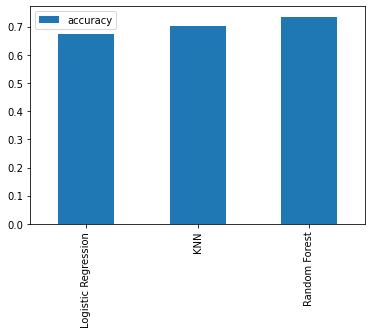

In [147]:
model_compare= pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

## Now we've a baseline model ... and we know a model's first predictions aren't always what we should based our next steps off. What should do ?

Let's look at the following:

* Hyperparameter tunning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tunning wiht RandomizedSearchCV



In [148]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [149]:
# Setup random seed
np.random.seed(42)

# Setup random Hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose = True)
# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(transformed_X_train, y_train)     

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 13.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [150]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [151]:
# Evaluate the randomized search RandomForestClassifier model 
rs_rf.score(transformed_X_test, y_test)

0.7287234042553191

## Evaluating our tunned machine learning classifier, beyond accuracy
* ROC curve and AUC score

* Confusion matrix

* Classification report

* Precision

* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [154]:
# Make predictions with tuned model
y_preds = rs_rf.predict(transformed_X_test)

In [155]:
y_preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [156]:
y_test

6823    0
5610    1
4689    1
1055    1
4816    1
       ..
2268    0
2835    1
3078    1
2338    1
6364    0
Name: answered, Length: 1504, dtype: int64

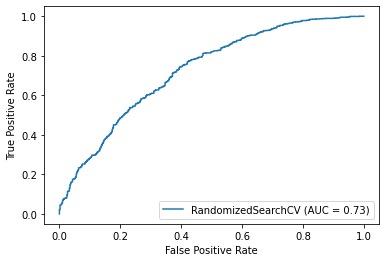

In [157]:
# PLot ROC curve and calculate AUC metric
plot_roc_curve( rs_rf, transformed_X_test, y_test)

In [158]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[173, 317],
       [ 91, 923]], dtype=int64)

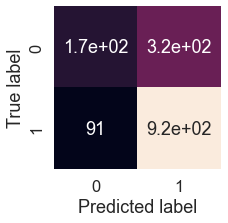

In [159]:
# Increase font size
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plot a confusion matrix using Seaborn's heatmap().
    
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     # annotate the boxes
                     annot=True,
                     cbar=False)
    # predictions go on the x-axis
    plt.xlabel("Predicted label")
    # True labels go on the y-axis
    plt.ylabel("True label")
    bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test,y_preds)

In [160]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.66      0.35      0.46       490
           1       0.74      0.91      0.82      1014

    accuracy                           0.73      1504
   macro avg       0.70      0.63      0.64      1504
weighted avg       0.72      0.73      0.70      1504



## Calculate evaluation metrics using cross-validation

rs_rf.best_params_


In [161]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [163]:
# Create a new classifier with the best parameters
clf = RandomForestClassifier(n_estimators=510, min_samples_split = 14, min_samples_leaf=1, max_depth=None)

In [164]:
X = df.drop(["answered", "date"], axis=1)

y= df["answered"]

X["location"] = X['location'].fillna(X['location'].mode()[0])

X["marital_status"] = X["marital_status"].fillna(X["marital_status"].mode()[0])

In [165]:
X.head()

,age,marital_status,location,salary_interval,active_portfolio,month,weekday,hour
0,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,DEZEMBRO,QUINTA-FEIRA,13
1,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,MARCO,SEGUNDA-FEIRA,12
2,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,MARCO,SEGUNDA-FEIRA,9
3,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,NOVEMBRO,TERCA-FEIRA,11
4,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,NOVEMBRO,SABADO,15


In [166]:
X.isna().sum()

age                 0
marital_status      0
location            0
salary_interval     0
active_portfolio    0
month               0
weekday             0
hour                0
dtype: int64

In [168]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder


# Now let's one hot encode the features with the same code as before

categorical_features = ["marital_status", "location", "salary_interval", "month", "weekday"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder ="passthrough")


# Fill train and test values separately

transformed_X = transformer.fit_transform(X)# fit and transform the training data


# Check transformed and filled X_train

transformed_X.toarray()

array([[0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.300000e+01,
        2.573505e+04, 1.300000e+01],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.300000e+01,
        2.573505e+04, 1.200000e+01],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.300000e+01,
        2.573505e+04, 9.000000e+00],
       ...,
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.700000e+01,
        0.000000e+00, 1.500000e+01],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.700000e+01,
        0.000000e+00, 1.700000e+01],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.700000e+01,
        0.000000e+00, 1.600000e+01]])

In [173]:
# Cross-validated accuracy

np.random.seed(42)
cv_acc = cross_val_score(clf,
                         transformed_X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.6675119618918193

In [174]:
# Cross-validated f1
np.random.seed(42)

cv_f1 = cross_val_score(clf,
                         transformed_X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1= np.mean(cv_f1)
cv_f1

0.792618154327013

In [175]:
# Cross-validated presicion

np.random.seed(42)

cv_precision = cross_val_score(clf,
                         transformed_X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.685218397106984

In [177]:
# Cross-validated recall


cv_recall = cross_val_score(clf,
                         transformed_X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall= np.mean(cv_recall)
cv_recall

0.9395073891625616

In [178]:
# Visualize cross-validated metrics

cv_metrics=  pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1":cv_f1},
                          index=[0])

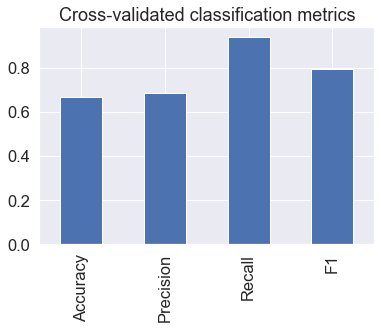

In [179]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                           legend = False);

In [180]:
# Save model to file
from joblib import dump, load
dump(clf, filename="./fullvenue/gs_random_forest_clf_model_1.joblib")

['./fullvenue/gs_random_forest_clf_model_1.joblib']

In [181]:
# Import a saved joblib model


loaded_job_model = load(filename="./fullvenue/gs_random_forest_clf_model_1.joblib")

## Test

In [183]:
df

,age,marital_status,location,salary_interval,active_portfolio,date,month,weekday,hour,answered
0,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,03/12/2020,DEZEMBRO,QUINTA-FEIRA,13,1
1,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,23/03/2020,MARCO,SEGUNDA-FEIRA,12,1
2,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,30/03/2020,MARCO,SEGUNDA-FEIRA,9,1
3,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,03/11/2020,NOVEMBRO,TERCA-FEIRA,11,1
4,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,21/11/2020,NOVEMBRO,SABADO,15,1
...,...,...,...,...,...,...,...,...,...,...
7511,33,UNIDO DE FACTO,SANTAREM,0,0.00,28/10/2020,OUTUBRO,QUARTA-FEIRA,14,1
7512,57,CASADO REG COMUNHAO ADQUIRIDOS,NaN,0,0.00,03/12/2020,DEZEMBRO,QUINTA-FEIRA,16,1
7513,57,CASADO REG COMUNHAO ADQUIRIDOS,NaN,0,0.00,17/12/2020,DEZEMBRO,QUINTA-FEIRA,15,0
7514,57,CASADO REG COMUNHAO ADQUIRIDOS,NaN,0,0.00,30/11/2020,NOVEMBRO,SEGUNDA-FEIRA,17,1


In [182]:
df_test = pd.read_csv("./fullvenue/test.csv")
df_test.head()

,n_cliente,age,marital_status,location,salary_interval,active_portfolio,month,week_day,hour,answered
0,1ca382fb705349feac5a7004d95cc653,36,SOLTEIRO,LISBOA,1000-1499,82311.12,JUNHO,DOMINGO,8,NaN
1,6849fe25a3224da4afc81248c6bcd5e9,48,CASADO REG COMUNHAO ADQUIRIDOS,SANTAREM,1000-1499,0.00,ABRIL,QUARTA-FEIRA,13,NaN
2,4694534a1101482b927c45d08d44e4b3,67,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,1000-1499,13028.96,MARCO,SEGUNDA-FEIRA,11,NaN
3,951582be2c1a4394abd5908329338bf8,35,SOLTEIRO,LISBOA,2000-2499,94843.20,NOVEMBRO,QUARTA-FEIRA,11,NaN


In [225]:
#car_sales = car_sales.rename(columns = {"Odometer (KM)": "Odometer (Miles)"})
df_test = df_test.rename(columns = {"week_day": "weekday"})

In [226]:
X_test_final = df_test.drop(["answered"], axis=1)

X_test_final.head()

,n_cliente,age,marital_status,location,salary_interval,active_portfolio,month,weekday,hour
0,1ca382fb705349feac5a7004d95cc653,36,SOLTEIRO,LISBOA,1000-1499,82311.12,JUNHO,DOMINGO,8
1,6849fe25a3224da4afc81248c6bcd5e9,48,CASADO REG COMUNHAO ADQUIRIDOS,SANTAREM,1000-1499,0.00,ABRIL,QUARTA-FEIRA,13
2,4694534a1101482b927c45d08d44e4b3,67,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,1000-1499,13028.96,MARCO,SEGUNDA-FEIRA,11
3,951582be2c1a4394abd5908329338bf8,35,SOLTEIRO,LISBOA,2000-2499,94843.20,NOVEMBRO,QUARTA-FEIRA,11


In [227]:
X_test_final.isna().sum()

n_cliente           0
age                 0
marital_status      0
location            0
salary_interval     0
active_portfolio    0
month               0
weekday             0
hour                0
dtype: int64

In [228]:
X_test_final = X_test_final.drop(["n_cliente"], axis=1)

X_test_final.head()

,age,marital_status,location,salary_interval,active_portfolio,month,weekday,hour
0,36,SOLTEIRO,LISBOA,1000-1499,82311.12,JUNHO,DOMINGO,8
1,48,CASADO REG COMUNHAO ADQUIRIDOS,SANTAREM,1000-1499,0.00,ABRIL,QUARTA-FEIRA,13
2,67,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,1000-1499,13028.96,MARCO,SEGUNDA-FEIRA,11
3,35,SOLTEIRO,LISBOA,2000-2499,94843.20,NOVEMBRO,QUARTA-FEIRA,11


In [229]:
X.head()

,age,marital_status,location,salary_interval,active_portfolio,month,weekday,hour
0,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,DEZEMBRO,QUINTA-FEIRA,13
1,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,MARCO,SEGUNDA-FEIRA,12
2,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,MARCO,SEGUNDA-FEIRA,9
3,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,NOVEMBRO,TERCA-FEIRA,11
4,53,CASADO REG COMUNHAO ADQUIRIDOS,LISBOA,0,25735.05,NOVEMBRO,SABADO,15


In [233]:
X = df.drop(["answered", "date"], axis=1)
X["location"] = X['location'].fillna(X['location'].mode()[0])

X["marital_status"] = X["marital_status"].fillna(X["marital_status"].mode()[0])

In [234]:
X.isna().sum()

age                 0
marital_status      0
location            0
salary_interval     0
active_portfolio    0
month               0
weekday             0
hour                0
dtype: int64

In [193]:
X_test_final.columns

Index(['age', 'marital_status', 'location', 'salary_interval',
       'active_portfolio', 'month', 'week_day', 'hour'],
      dtype='object')

In [194]:
X.columns

Index(['age', 'marital_status', 'location', 'salary_interval',
       'active_portfolio', 'month', 'weekday', 'hour'],
      dtype='object')

In [195]:
X_test_final.shape, X.shape

((4, 8), (7516, 8))

In [202]:
len(X_test_final)

4

In [199]:
len(X)

7516

In [235]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder


# Now let's one hot encode the features with the same code as before

categorical_features = ["marital_status", "location", "salary_interval", "month", "weekday"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder ="passthrough")


# Fill train and test values separately

transformed_X = transformer.fit_transform(X)# fit and transform the training data


transformed_X_test_final = transformer.transform(X_test_final)





# Check transformed and filled X_train

transformed_X.toarray()

array([[0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.300000e+01,
        2.573505e+04, 1.300000e+01],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.300000e+01,
        2.573505e+04, 1.200000e+01],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.300000e+01,
        2.573505e+04, 9.000000e+00],
       ...,
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.700000e+01,
        0.000000e+00, 1.500000e+01],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.700000e+01,
        0.000000e+00, 1.700000e+01],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 5.700000e+01,
        0.000000e+00, 1.600000e+01]])

In [ ]:
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [218]:
rs_rf.best_estimator_

RandomForestClassifier(min_samples_split=14, n_estimators=510)

## Test predictions

In [236]:
rs_rf.predict(transformed_X_test_final)

array([1, 1, 1, 1], dtype=int64)

## Notes

for the realization of this model, i experimented with logistic regression, k nearest neighbor, and random forest classifier, the latter being the one that achieved the best results, in this case the dataset was unbalanced so the f1 score was taken into consideration for the evaluation of the model, in general random forest is a great model because due to its bootstrap mechanism, low bias(good performant in the training set) and low variance(good performance in the test set) can be achieved, cross validation was performed for hyper -parameter tuning, the exploratory analysis of the data was also carried out